# An Analysis of Number of Firms in Metropolitan Areas by Owner Sex

In this study, firm ownership in 101 metropolitan cities with more than 50,000 firms in the USA was analyzed by gender.

DATA=

“Firms by Metropolitan Statistical Area (MSA) and Owner Sex for MSAs with more than 50,000 Firms.”

https://data.sba.gov/en/dataset/total-number-of-firms-employer-nonemployer-by-owner-sex-2017.


### Null hypothesis (H0):  
There is no significant difference between groups.

### Alternative hypothesis (Ha):
There is a significant difference between groups.


An important decision point when working with a sample of data is whether to use parametric or non-parametric statistical methods.

Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. 

If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

There are a range of techniques that you can use to check if your data sample deviates from a Gaussian distribution, called normality tests. So, first I will test whether the data sample is normally distributed.

#### H0:  Sample looks Gaussian
#### Ha:  Sample does not look Gaussian


There are many statistical tests that we can use to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution. 


Shapiro-Wilk test in Python was used for checking normality. 


# Checking Normality

## Importing Libraries

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## Importing Data

First of all, i tested whether data is normally distributed or not.

Data was rearrange suitable for the test and saved in a different excel file.

In [2]:
file = 'dataPYTHON.xlsx'
df = pd.read_excel(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             202 non-null    object
 1   metro           202 non-null    int64 
 2   number_of_firm  202 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.9+ KB


The Shapiro() SciPy function calculated the Shapiro-Wilk on the given dataset.

In [3]:
#ARE POPULATION DISTRIBUTIONS NORMAL???

sampling_difference = df['number_of_firm'][df['sex'] == 'female'].values - \
                      df['number_of_firm'][df['sex'] == 'male'].values

stats.shapiro(sampling_difference)

ShapiroResult(statistic=0.4463263750076294, pvalue=9.273221580769637e-18)

In [4]:
from scipy.stats import shapiro
stat, p = shapiro(sampling_difference)
print('Statistic=%.4f, p=%.4f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistic=0.4463, p=0.0000
Sample does not look Gaussian (reject H0)


The function returned both the W-statistic calculated by the test and the p-value.

The null hypothesis was rejected because the p-value was less than the alpha value. So our data sample does NOT look normal distribution.

One method of visually checking the distribution is to use a probability plot with or without the correlation value, to assess the correlation of the observed values with the theoretical distribution in question - in the current case it would not be the Gaussian distribution.

probplot() method from Scipy.stats was used.

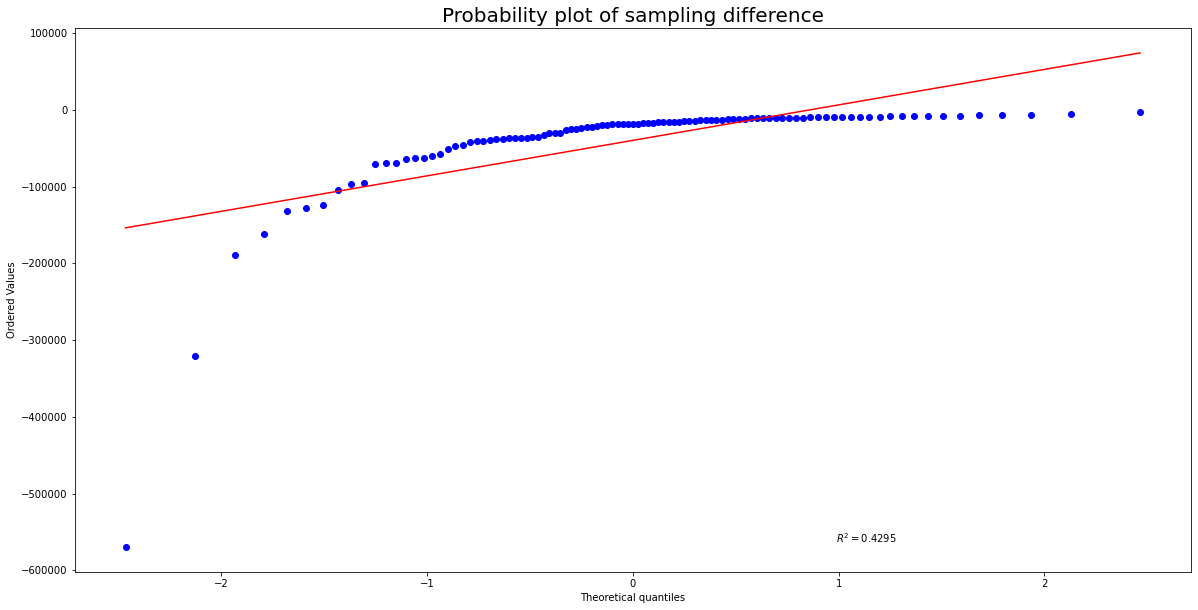

In [5]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(sampling_difference, plot= plt, rvalue= True)
ax.set_title("Probability plot of sampling difference", fontsize= 20)
ax.set

plt.show()

As I mentioned before, If a data sample is Gaussian, then we can use parametric statistical methods.

However, If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

# Non-parametric Statistical Method

As seen above, my data sample is not Gaussian. So, the Mann-Whitney U test,  one of the non-parametric statistical methods, was used in this study.

Again, data was made suitable for the test and saved in a different excel file.

In [6]:
file = 'dataPYTHON_Mann.xlsx'
df2 = pd.read_excel(file)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   female  101 non-null    int64
 1   male    101 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [7]:
# code for Mann-Whitney U test
from scipy.stats import mannwhitneyu
# perform mann whitney test
stat, p_value = mannwhitneyu(df2['female'], df2['male'])
print('Statistics=%.2f, p=%.8f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=3496.00, p=0.00011282
Reject Null Hypothesis (Significant difference between two samples)


The null hypothesis was rejected again because the p-value was less than the alpha value. 


###### Null hypothesis (H0):  
There is no significant difference between groups.
###### Alternative hypothesis (Ha):
There is a significant difference between groups.


It means that significant difference between female and male owner samples.

##### According to the analysis, there is a significant difference in the number of firms in metropolitan areas in terms of the gender of the firm owners.